In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

In [2]:
df = pd.read_csv("ted.csv")
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [4]:
for col in df.columns:
    print("{}: {}".format(col ,df[col].isnull().sum()))

comments: 0
description: 0
duration: 0
event: 0
film_date: 0
languages: 0
main_speaker: 0
name: 0
num_speaker: 0
published_date: 0
ratings: 0
related_talks: 0
speaker_occupation: 6
tags: 0
title: 0
url: 0
views: 0


In [5]:
for col in df.columns:
    print("{}: {}".format(col ,df[col].unique().shape[0]))

comments: 559
description: 2550
duration: 1083
event: 355
film_date: 735
languages: 66
main_speaker: 2156
name: 2550
num_speaker: 5
published_date: 2490
ratings: 2550
related_talks: 2550
speaker_occupation: 1459
tags: 2530
title: 2550
url: 2550
views: 2550


In [6]:
df["event"].value_counts()[:70]

TED2014                     84
TED2009                     83
TED2013                     77
TED2016                     77
TED2015                     75
                            ..
TED Talks Education          8
TEDMED 2011                  7
TEDxPSU                      7
TED@BCG San Francisco        7
TED Fellows Retreat 2015     7
Name: event, Length: 70, dtype: int64

In [7]:
def extract_year(s):
    s = str(s).strip()
    pattern = r"[0-9]{4}$"
    ls = re.findall(pattern, s)
    if len(ls) > 0:
        return ls[0]
    else:
        return np.nan

In [8]:
df["year"] = df["event"].apply(extract_year)

In [9]:
df["year"].value_counts()
df["year"].isnull().sum()

734

In [10]:
df[["comments", "num_speaker"]].groupby("num_speaker").mean().sort_values(by = "comments", ascending = False)

,comments
num_speaker,
1,192.990770
2,140.755102
4,90.333333
3,75.400000
5,6.000000


In [11]:
df["num_speaker"].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

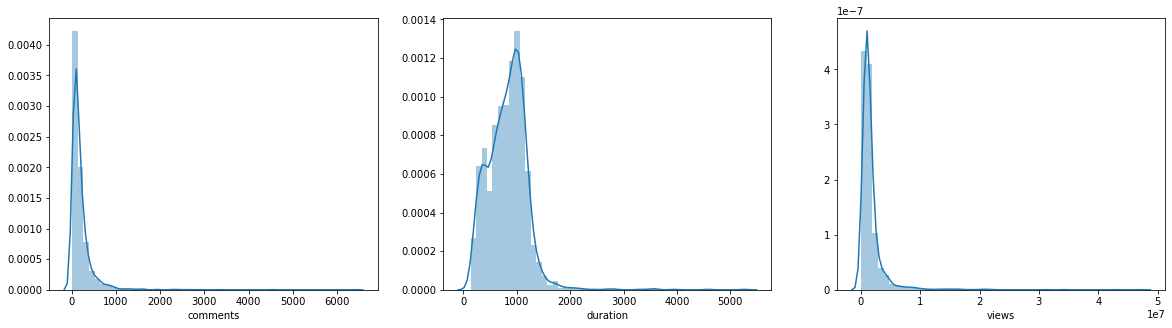

In [12]:
fig, axs = plt.subplots(figsize=(20,5), ncols=3)

for idx, col in enumerate(["comments", "duration", "views"]):
    sns.distplot(df[col], ax = axs[idx])
    

In [13]:
df[['title', 'main_speaker', 'views']].sort_values('views', ascending=False)[:30]

,title,main_speaker,views
0,Do schools kill creativity?,Ken Robinson,47227110
1346,Your body language may shape who you are,Amy Cuddy,43155405
677,How great leaders inspire action,Simon Sinek,34309432
837,The power of vulnerability,Brené Brown,31168150
452,10 things you didn't know about orgasm,Mary Roach,22270883
1776,How to speak so that people want to listen,Julian Treasure,21594632
201,My stroke of insight,Jill Bolte Taylor,21190883
5,Why we do what we do,Tony Robbins,20685401
2114,This is what happens when you reply to spam email,James Veitch,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465


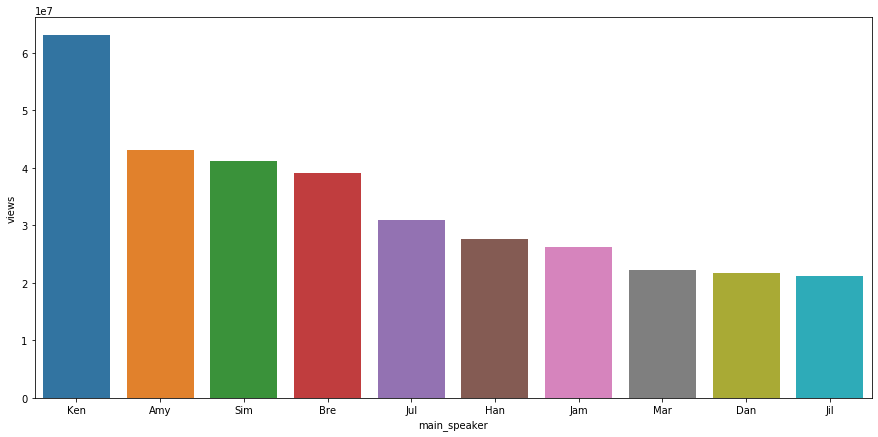

In [35]:
mainS = df[["main_speaker", "views", "comments"]].groupby("main_speaker").sum().sort_values(by = "views", ascending = False)[:10].reset_index()
mainS["main_speaker"] = mainS["main_speaker"].apply(lambda x: x[:3])
plt.figure(figsize=(15,7))
sns.barplot(x='main_speaker', y='views', data=mainS)

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64


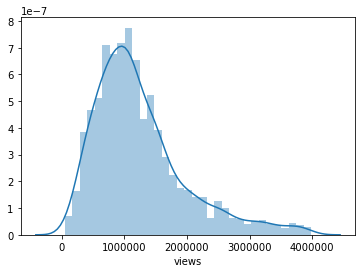

In [43]:
print(df["views"].describe())
sns.distplot(df[df["views"] < 0.4e7]["views"])

In [48]:
df[["comments", "main_speaker", "title", "views"]].sort_values(by = "comments", ascending = False)[:15]

,comments,main_speaker,title,views
96,6404,Richard Dawkins,Militant atheism,4374792
0,4553,Ken Robinson,Do schools kill creativity?,47227110
644,3356,Sam Harris,Science can answer moral questions,3433437
201,2877,Jill Bolte Taylor,My stroke of insight,21190883
1787,2673,David Chalmers,How do you explain consciousness?,2162764
954,2492,Janet Echelman,Taking imagination seriously,1832930
840,2374,Lesley Hazleton,On reading the Koran,1847256
1346,2290,Amy Cuddy,Your body language may shape who you are,43155405
661,2272,Michael Specter,The danger of science denial,1838628
677,1930,Simon Sinek,How great leaders inspire action,34309432


count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64


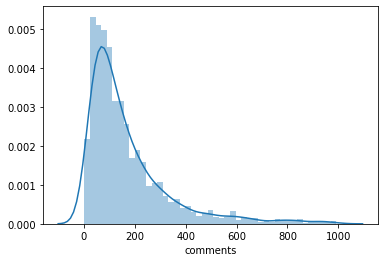

In [50]:
print(df["comments"].describe())
sns.distplot(df[df["comments"] < 1000]["comments"])

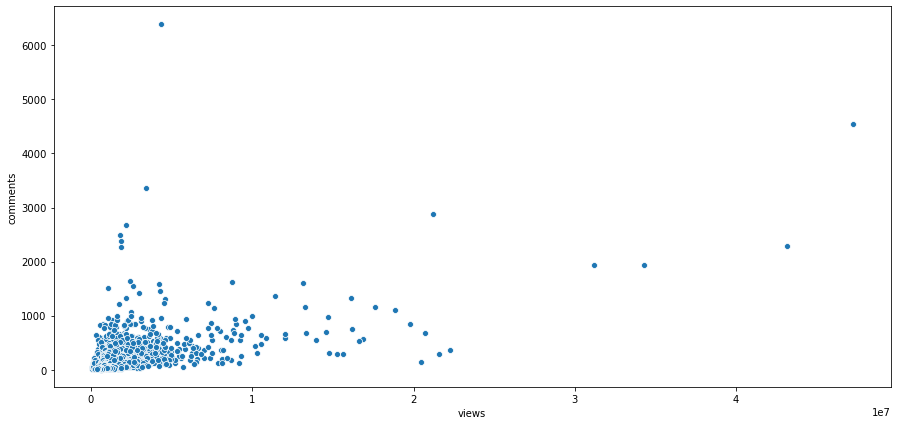

In [54]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = "views", y = "comments", data = df)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   object
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   object
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

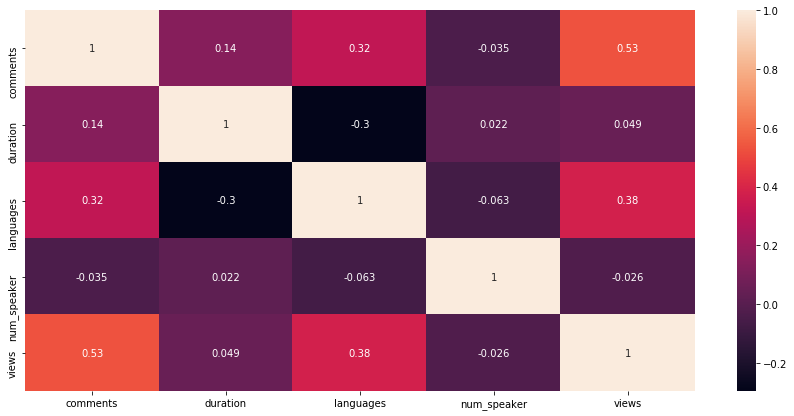

In [71]:
int_col = df.columns.to_series().groupby(df.dtypes).groups
int_col = {k.name:v for k, v in int_col.items()}
corr_map = df[int_col["int64"].values].corr()
plt.figure(figsize=(15,7))

sns.heatmap(corr_map, annot = True)

In [36]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [38]:
def convert2year(s):
    s = str(s).split("-")[-1]
    return s
df["year"] = df['published_date'].apply(convert2year)

In [40]:
df["year"].isnull().sum()

0

In [87]:
from datetime import datetime
def month_name(s):
    s = datetime.strptime(s, "%d-%m-%Y")
    print(s)
    return s.strftime("%b")


In [88]:
df["film_month"] = df["film_date"].apply(month_name)


2006-02-25 00:00:00
2006-02-25 00:00:00
2006-02-24 00:00:00
2006-02-26 00:00:00
2006-02-22 00:00:00
2006-02-02 00:00:00
2006-02-24 00:00:00
2006-02-23 00:00:00
2006-02-02 00:00:00
2006-02-25 00:00:00
2006-02-26 00:00:00
2006-02-26 00:00:00
2006-02-23 00:00:00
2006-02-06 00:00:00
2006-02-23 00:00:00
2006-02-23 00:00:00
2004-02-26 00:00:00
2006-02-24 00:00:00
2005-02-25 00:00:00
2005-07-14 00:00:00
2006-02-23 00:00:00
2004-02-24 00:00:00
2006-02-23 00:00:00
2006-02-24 00:00:00
2004-02-04 00:00:00
2005-07-14 00:00:00
2005-07-07 00:00:00
2004-02-27 00:00:00
2004-02-26 00:00:00
2004-02-02 00:00:00
2005-07-15 00:00:00
2005-02-26 00:00:00
2005-07-14 00:00:00
2005-07-13 00:00:00
2005-07-01 00:00:00
2005-07-14 00:00:00
2005-07-12 00:00:00
2006-02-24 00:00:00
2005-02-24 00:00:00
2005-02-24 00:00:00
2005-02-17 00:00:00
2005-02-24 00:00:00
2005-07-14 00:00:00
2006-02-23 00:00:00
2005-02-24 00:00:00
2005-02-24 00:00:00
2006-02-23 00:00:00
2005-02-23 00:00:00
2006-11-30 00:00:00
2006-02-23 00:00:00


2015-01-29 00:00:00
2015-08-26 00:00:00
2015-03-28 00:00:00
2015-10-15 00:00:00
2015-05-27 00:00:00
2015-10-10 00:00:00
2015-10-10 00:00:00
2015-08-26 00:00:00
2015-09-29 00:00:00
2015-09-02 00:00:00
2015-03-16 00:00:00
2015-10-10 00:00:00
2015-10-17 00:00:00
2015-10-15 00:00:00
2013-03-16 00:00:00
2015-08-26 00:00:00
2015-11-14 00:00:00
2015-11-14 00:00:00
2015-11-14 00:00:00
2015-10-10 00:00:00
2015-03-16 00:00:00
2014-11-20 00:00:00
2015-05-27 00:00:00
2015-12-08 00:00:00
2015-06-16 00:00:00
2015-10-10 00:00:00
2015-11-14 00:00:00
2015-12-08 00:00:00
2015-06-18 00:00:00
2015-03-16 00:00:00
2015-09-17 00:00:00
2015-12-08 00:00:00
2015-09-29 00:00:00
2015-09-25 00:00:00
2015-12-08 00:00:00
2015-09-29 00:00:00
2015-11-14 00:00:00
2015-12-08 00:00:00
2015-05-20 00:00:00
2015-05-27 00:00:00
2015-12-08 00:00:00
2015-12-08 00:00:00
2015-10-10 00:00:00
2014-11-15 00:00:00
2015-12-08 00:00:00
2015-09-29 00:00:00
2015-10-09 00:00:00
2014-10-06 00:00:00
2015-11-18 00:00:00
2015-05-27 00:00:00


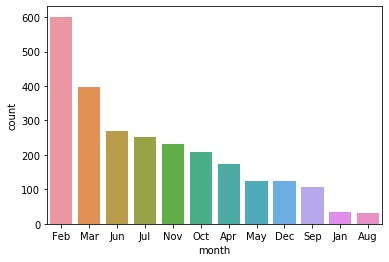

In [99]:
film_df = pd.DataFrame(df["film_month"].value_counts()).reset_index()
film_df.rename(columns = {"index": "month", "film_month": "count"}, inplace = True)
sns.barplot("month", "count", data = film_df)

In [101]:
df[["year", "views", "comments"]].groupby("year").mean().sort_values(by = "views", ascending = False)

,views,comments
year,,
2006,4.130967e+06,363.420000
2013,2.234803e+06,288.663934
2015,1.911760e+06,118.031818
2014,1.856316e+06,158.691667
2016,1.704276e+06,81.308642
2012,1.600203e+06,209.339869
2010,1.566904e+06,315.000000
2009,1.540809e+06,198.666667
2011,1.534482e+06,247.226054


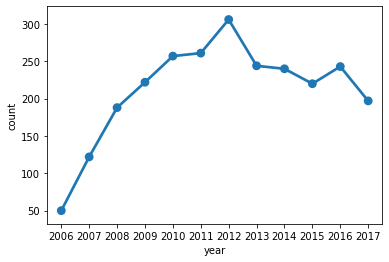

In [108]:
year_df = pd.DataFrame(df["year"].value_counts().reset_index())
year_df.rename(columns = {"index" : "year", "year": "count"}, inplace = True)

sns.pointplot(x = "year", y = "count", data = year_df)

In [109]:
df["year"].unique()

array(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'], dtype=object)

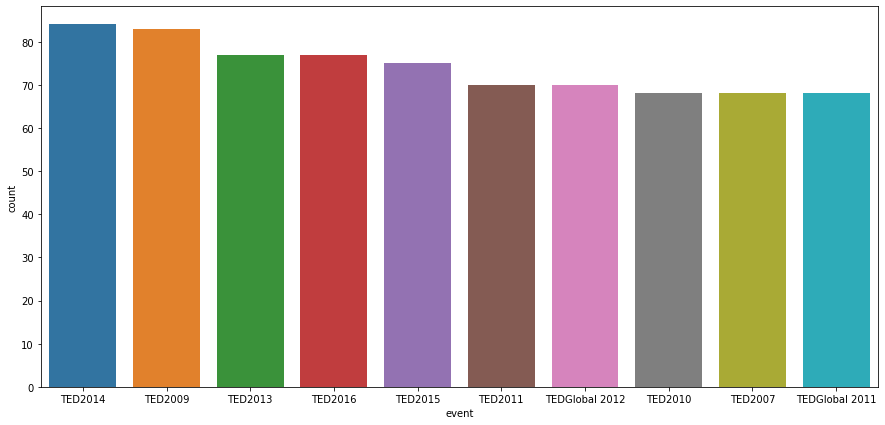

In [119]:
event_df = pd.DataFrame(df["event"].value_counts().reset_index())[:10]
event_df.rename(columns = {"event": "count", "index" : "event"}, inplace = True)
plt.figure(figsize=(15,7))

sns.barplot("event", "count", data = event_df)

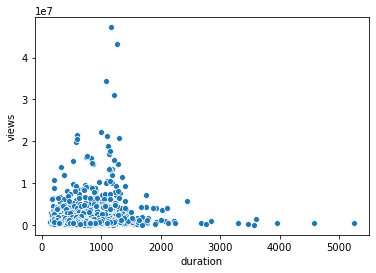

In [111]:
sns.scatterplot("duration", "views", data = df)

In [120]:
df.head()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year,film_month
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,Feb
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006,Feb
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,Feb
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006,Feb
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,28-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,Feb


In [121]:
rating_emo = []


In [122]:
for val in df["ratings"].values:
    val = val[1:-1]
    nval = re.sub(r"},", "};", val)
    nval = nval.split(";")
#     print(nval)
    for rate in nval:
        nameP = r"\'([A-Za-z]+)\'"
        rating_emo.append(re.findall(nameP, rate)[2])
    


In [123]:
rating_emo = list(set(rating_emo))

In [124]:
rating_emo

['Longwinded',
 'Ingenious',
 'Confusing',
 'Fascinating',
 'count',
 'Obnoxious',
 'OK',
 'Persuasive',
 'Funny',
 'Beautiful',
 'Inspiring',
 'Unconvincing',
 'Courageous',
 'Informative']

In [155]:
def get_count(s, emo):
    ratings, emo = s
    ratings = eval(ratings)
    count = 0
    for val in s:
        if val["name"] == emo:
            count = val["count"]
    return count
    
        
        

In [154]:

for emo in rating_emo:
    df[emo] = emo
    df[emo] = df.apply(lambda x: get_count(x["ratings"], emo), axis=1)
    

Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded

Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded
Longwinded

Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious
Ingenious


Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing
Confusing


Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fascinating
Fasc

count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
coun

count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
count
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Ob

Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious
Obnoxious


Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive
Persuasive

Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funny
Funn

Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful
Beautiful


Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring
Inspiring


Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing

Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing
Unconvincing

Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous
Courageous

Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Informative
Info

In [149]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year,film_month,Longwinded
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006,Feb,Longwinded
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006,Feb,Longwinded
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006,Feb,Longwinded
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006,Feb,Longwinded
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,28-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006,Feb,Longwinded
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,06-06-2017,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,20-09-2017,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2017,Jun,Longwinded
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,24-04-2017,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,20-09-2017,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2017,Apr,Longwinded
2547,10,Science fiction visions of the future show us ...,651,TED2017,24-04-2017,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,21-09-2017,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,2017,Apr,Longwinded
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,08-07-2017,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,22-09-2017,"[{'id': 11, 'name': 'Longwinded', 